## Arrhenius plot and diffusion kinetic parameters for step-heating experiments

This notebook uses the reduced JSON data file of each step-heating experiments from the HAL to create their Arrhenius plots and calculate the diffusion kinetic parameters.

In [445]:
#import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [446]:
#defining some constants
gas_constant = 8.314472   # universal gas constant in kJ/K*mol
avogadro = 6.022e+23   # in 1/mol

### 1. Input sample specific values

In the cell below, input all necessary information for the specific sample.

In [447]:
Sample_ID = 'RS23_G3'

# slab dimensions in microns
width = 84.58
length_1 = 541.58
length_2 = 530.46

# insert zircon density
zirc_rho = 4.36  # in g/cm^3

# dose
dose_UPb = 5.01e18 # time-integrated dose in alphas/gram
dose_eq1 = 3.49e18  # equivalent dose (model 1) in alphas/gram
dose_eq2 = 4.88e18 # equivalent dose (model 1) in alphas/gram

half_width = (width/2) / 1e4 # in cm

In [448]:
#calculating volume 

vol = (width * length_1 * length_2) / 1e12  # in cm^3

#calculating volumetric mol of He
#make sure to choose the alpha dose value you want to use

He_mol_total = ((vol * zirc_rho) * dose_eq1) / avogadro   # in mol
#vol_He = (1e15 * (vol * zirc_rho) * alpha) / avogadro  # in fmol

#vol_He_sci = "{:e}".format(vol_He)
#print(vol_He_sci)

print(He_mol_total, ' mol')

6.139798306663424e-10  mol


### 2. Import JSON file
Use the script below to read a JSON from a local file. Simply input the name of the JSON file as `filename.json`. IMPORTANT: the file needs to be in the same directory as this notebook.

In [449]:
He_data = pd.read_json('RS23_G3_diff_cell_He_data.json', orient='index')

# adding column name to the respective columns
He_data.reset_index(inplace=True)  # assigning simple index for ease of calculation
He_data.columns =['sample_ID' , 'ncc_4He' , 'ncc_4He_1sig' , 'mol_He' , 'mol_He_1sig' , 'notes' , 'temp_degC', 'time_s', 't_err']

He_data

,sample_ID,ncc_4He,ncc_4He_1sig,mol_He,mol_He_1sig,notes,temp_degC,time_s,t_err
0,RS23_G3_150_1,5.426798,0.015869,2.421164e-13,7.079897e-16,None,150,7200,335
1,RS23_G3_175_1,6.377844,0.022385,2.845473e-13,9.986879e-16,None,175,7200,294
2,RS23_G3_200_1,10.266701,0.032055,4.580486e-13,1.430126e-15,None,200,7200,322
3,RS23_G3_225_1,19.053603,0.056721,8.500760e-13,2.530597e-15,None,225,7200,288
4,RS23_G3_250_1,42.031764,0.333623,1.875246e-12,1.488459e-14,None,250,7200,293
5,RS23_G3_275_1,84.689438,0.672036,3.778417e-12,2.998287e-14,None,275,7200,306
6,RS23_G3_300_1,119.143515,0.646816,5.315585e-12,2.885769e-14,None,300,5400,277
7,RS23_G3_325_1,211.415753,1.147681,9.432308e-12,5.120374e-14,None,325,5400,295
8,RS23_G3_350_1,237.273179,1.288025,1.058594e-11,5.746519e-14,None,350,3600,302
9,RS23_G3_330_2,99.457668,0.539996,4.437301e-12,2.409191e-14,None,330,3600,299


#### Appending temperature, time, and cumulative time

The easiest way would be to compile the heating temperature and time in an excel file (with column labels) and appending it to the data frame.

If temp and time were input in `He_line_calc_diff_cell.ipynb` script, then now just need to calculate `t_cum`.

In [450]:
#adding new columns from excel
#temp_time = pd.read_excel('G168_heating_tT.xlsx')

#He_data['temp_degC'] = temp_time ['temp_degC'].values
#He_data['time_s'] = temp_time ['time_s'].values

#adding new column for cumulative time in s
He_data['t_cum'] = He_data['time_s'].cumsum()

He_data

,sample_ID,ncc_4He,ncc_4He_1sig,mol_He,mol_He_1sig,notes,temp_degC,time_s,t_err,t_cum
0,RS23_G3_150_1,5.426798,0.015869,2.421164e-13,7.079897e-16,None,150,7200,335,7200
1,RS23_G3_175_1,6.377844,0.022385,2.845473e-13,9.986879e-16,None,175,7200,294,14400
2,RS23_G3_200_1,10.266701,0.032055,4.580486e-13,1.430126e-15,None,200,7200,322,21600
3,RS23_G3_225_1,19.053603,0.056721,8.500760e-13,2.530597e-15,None,225,7200,288,28800
4,RS23_G3_250_1,42.031764,0.333623,1.875246e-12,1.488459e-14,None,250,7200,293,36000
5,RS23_G3_275_1,84.689438,0.672036,3.778417e-12,2.998287e-14,None,275,7200,306,43200
6,RS23_G3_300_1,119.143515,0.646816,5.315585e-12,2.885769e-14,None,300,5400,277,48600
7,RS23_G3_325_1,211.415753,1.147681,9.432308e-12,5.120374e-14,None,325,5400,295,54000
8,RS23_G3_350_1,237.273179,1.288025,1.058594e-11,5.746519e-14,None,350,3600,302,57600
9,RS23_G3_330_2,99.457668,0.539996,4.437301e-12,2.409191e-14,None,330,3600,299,61200


### 3. Making an Arrhenius plot
#### Calculating the fraction released `frac`, cumulative fraction released `f_cum`, and ln(D/${a^2}$) `ln_D_a2` for all the heating steps.

In [451]:
#empty lists that we'll append to
frac = []
ln_D_a2 = []

#calculating just the fraction released at individual steps

for i in range(len(He_data)):
    frac = He_data.mol_He / He_mol_total

He_data['frac'] = frac

#calculating cumulative fraction released and putting it into a new column
He_data['f_cum'] = He_data['frac'].cumsum()

# first define the first step with f_cum that is more or equal to 0.45
fcum_45 = 50

#now calculating ln(D/a^2)
for i in range(len(He_data)):

    if i == 0:
        ln_Da2 = np.log((He_data.f_cum[i] ** 2) * (np.pi / (4 * He_data.time_s[i])))
    
    elif 0 < i < fcum_45:
        ln_Da2 = np.log((np.pi * (He_data.f_cum[i]**2 - He_data.f_cum[i-1]**2)) / (4 * He_data.time_s[i]))
        
    else:
        ln_Da2 = np.log((-4 / (np.pi**2 * He_data.time_s[i])) * np.log((1 - He_data.f_cum[i])/(1 - He_data.f_cum[i-1])))
        
    ln_D_a2.append(ln_Da2) 

#adding list into dataframe
He_data['ln_D_a2'] = ln_D_a2

He_data

,sample_ID,ncc_4He,ncc_4He_1sig,mol_He,mol_He_1sig,notes,temp_degC,time_s,t_err,t_cum,frac,f_cum,ln_D_a2
0,RS23_G3_150_1,5.426798,0.015869,2.421164e-13,7.079897e-16,None,150,7200,335,7200,0.000394,0.000394,-24.799998
1,RS23_G3_175_1,6.377844,0.022385,2.845473e-13,9.986879e-16,None,175,7200,294,14400,0.000463,0.000858,-23.483131
2,RS23_G3_200_1,10.266701,0.032055,4.580486e-13,1.430126e-15,None,200,7200,322,21600,0.000746,0.001604,-22.331084
3,RS23_G3_225_1,19.053603,0.056721,8.500760e-13,2.530597e-15,None,225,7200,288,28800,0.001385,0.002988,-21.089195
4,RS23_G3_250_1,42.031764,0.333623,1.875246e-12,1.488459e-14,None,250,7200,293,36000,0.003054,0.006043,-19.621720
5,RS23_G3_275_1,84.689438,0.672036,3.778417e-12,2.998287e-14,None,275,7200,306,43200,0.006154,0.012197,-18.218241
6,RS23_G3_300_1,119.143515,0.646816,5.315585e-12,2.885769e-14,None,300,5400,277,48600,0.008658,0.020854,-16.994749
7,RS23_G3_325_1,211.415753,1.147681,9.432308e-12,5.120374e-14,None,325,5400,295,54000,0.015363,0.036217,-15.875001
8,RS23_G3_350_1,237.273179,1.288025,1.058594e-11,5.746519e-14,None,350,3600,302,57600,0.017242,0.053458,-14.902253
9,RS23_G3_330_2,99.457668,0.539996,4.437301e-12,2.409191e-14,None,330,3600,299,61200,0.007227,0.060685,-15.530467


#### Calculating uncertainties for `D_a2`.

We will use equations 20 and 24 of Ginster (2018, dissertation) to calculate the uncertainty for `D_a2`.

First, calculating error with respect to uncertainty in evolved gas quantities `mol_He_1sig`.

In [452]:
D_a2_sig_X = []

#now calculating uncertainty for ln(D/a^2)
#but first define if you want to calc using 1 or 2 sig uncertainty of the evolved gas mol
sig = 1

for i in range(len(He_data)):

    if i == 0:
        long_eq = ((1 - He_data.f_cum[i]) * (sig*He_data.mol_He_1sig[i]))**2 + (He_data.f_cum[i]**2) \
                    * np.sum((sig*He_data.mol_He_1sig[1:])**2)
        Da2_sig_X = (np.pi/(2 * He_data.time_s[i])) * (He_data.f_cum[i]/He_mol_total) * np.sqrt(long_eq)
    
    elif 0 < i < fcum_45:
        long_eq1 = ((He_data.f_cum[i] * (1 - He_data.f_cum[i]) - He_data.f_cum[i-1] * (1 - He_data.f_cum[i-1]))**2) \
                    * np.sum((sig*He_data.mol_He_1sig[:i])**2)
        long_eq2 = ((He_data.f_cum[i] * (1 - He_data.f_cum[i]) + He_data.f_cum[i-1]**2)**2) \
                    * ((sig*He_data.mol_He_1sig[i])**2)
        long_eq3 = ((He_data.f_cum[i-1]**2 - He_data.f_cum[i]**2)**2) \
                    * np.sum((sig*He_data.mol_He_1sig[i+1:])**2)
        Da2_sig_X = (np.pi/(2 * He_data.time_s[i] * He_mol_total)) * np.sqrt(long_eq1 + long_eq2 + long_eq3)
        
    else:
        long_eq4 = ((1 + (He_data.f_cum[i-1] / (1 - He_data.f_cum[i-1])))**2) * (sig*He_data.mol_He_1sig[i])**2
        long_eq5 = ((He_data.f_cum[i-1]/(1 - He_data.f_cum[i-1]) - He_data.f_cum[i]/(1-He_data.f_cum[i]))**2) \
                    * np.sum((sig*He_data.mol_He_1sig[i+1:]**2))
        Da2_sig_X = (4 / (np.pi * He_data.time_s[i] * He_mol_total)) * np.sqrt(long_eq4 + long_eq5)
        
    D_a2_sig_X.append(Da2_sig_X) 

#adding list into dataframe
He_data['D_a2_sig_X'] = D_a2_sig_X

Next, we'll calculate error in `D_a2` wrt to `t_err`, `D_a2_sig_t`. For now we will use the cooling time as the `t_err`.

In [453]:
D_a2_sig_t = []

#now calculating uncertainty for ln(D/a^2)

for i in range(len(He_data)):

    if i == 0:
        Da2_sig_t = np.absolute((np.pi * He_data.f_cum[i]**2 / 4) * (-1 * He_data.t_err[i] / He_data.time_s[i]**2))
    
    elif 0 < i < fcum_45:
        Da2_sig_t = np.absolute((np.pi * (He_data.f_cum[i]**2 - He_data.f_cum[i-1]**2) / 4) 
                                * (-1 * He_data.t_err[i] / He_data.time_s[i]**2))
        
    else:
        Da2_sig_t = np.absolute((-4 / np.pi**2 * np.log((1 - He_data.f_cum[i])/(1 - He_data.f_cum[i-1]))) 
                                * (-1 * He_data.t_err[i] / He_data.time_s[i]**2)) 
        
    D_a2_sig_t.append(Da2_sig_t) 

#adding list into dataframe
He_data['D_a2_sig_t'] = D_a2_sig_t

He_data

,sample_ID,ncc_4He,ncc_4He_1sig,mol_He,mol_He_1sig,notes,temp_degC,time_s,t_err,t_cum,frac,f_cum,ln_D_a2,D_a2_sig_X,D_a2_sig_t
0,RS23_G3_150_1,5.426798,0.015869,2.421164e-13,7.079897e-16,None,150,7200,335,7200,0.000394,0.000394,-24.799998,1.002148e-13,7.892417e-13
1,RS23_G3_175_1,6.377844,0.022385,2.845473e-13,9.986879e-16,None,175,7200,294,14400,0.000463,0.000858,-23.483131,3.301611e-13,2.584763e-12
2,RS23_G3_200_1,10.266701,0.032055,4.580486e-13,1.430126e-15,None,200,7200,322,21600,0.000746,0.001604,-22.331084,8.925800e-13,8.958941e-12
3,RS23_G3_225_1,19.053603,0.056721,8.500760e-13,2.530597e-15,None,225,7200,288,28800,0.001385,0.002988,-21.089195,2.896484e-12,2.774209e-11
4,RS23_G3_250_1,42.031764,0.333623,1.875246e-12,1.488459e-14,None,250,7200,293,36000,0.003054,0.006043,-19.621720,3.209589e-11,1.224419e-10
5,RS23_G3_275_1,84.689438,0.672036,3.778417e-12,2.998287e-14,None,275,7200,306,43200,0.006154,0.012197,-18.218241,1.332267e-10,5.203641e-10
6,RS23_G3_300_1,119.143515,0.646816,5.315585e-12,2.885769e-14,None,300,5400,277,48600,0.008658,0.020854,-16.994749,3.131836e-10,2.134815e-09
7,RS23_G3_325_1,211.415753,1.147681,9.432308e-12,5.120374e-14,None,325,5400,295,54000,0.015363,0.036217,-15.875001,9.156928e-10,6.966313e-09
8,RS23_G3_350_1,237.273179,1.288025,1.058594e-11,5.746519e-14,None,350,3600,302,57600,0.017242,0.053458,-14.902253,2.266736e-09,2.829686e-08
9,RS23_G3_330_2,99.457668,0.539996,4.437301e-12,2.409191e-14,None,330,3600,299,61200,0.007227,0.060685,-15.530467,1.110992e-09,1.494763e-08


Now calculating error in D/a2 propogated from both `mol_He_1sig` and `t_err`, `D_a2_sig`, and calculating `ln_D_a2_sig`.

In [454]:
D_a2_sig = []
ln_D_a2_sig = []

for i in range(len(He_data)):
    
    Da2_sig = np.sqrt(He_data.D_a2_sig_X[i]**2 + He_data.D_a2_sig_t[i]**2)
    ln_Da2_sig = np.log(np.exp(He_data.ln_D_a2[i]) + Da2_sig) - He_data.ln_D_a2[i]
    
    D_a2_sig.append(Da2_sig)
    ln_D_a2_sig.append(ln_Da2_sig)
    
He_data['D_a2_sig'] = D_a2_sig
He_data['ln_D_a2_sig'] = ln_D_a2_sig

He_data

,sample_ID,ncc_4He,ncc_4He_1sig,mol_He,mol_He_1sig,notes,temp_degC,time_s,t_err,t_cum,frac,f_cum,ln_D_a2,D_a2_sig_X,D_a2_sig_t,D_a2_sig,ln_D_a2_sig
0,RS23_G3_150_1,5.426798,0.015869,2.421164e-13,7.079897e-16,None,150,7200,335,7200,0.000394,0.000394,-24.799998,1.002148e-13,7.892417e-13,7.955787e-13,0.045835
1,RS23_G3_175_1,6.377844,0.022385,2.845473e-13,9.986879e-16,None,175,7200,294,14400,0.000463,0.000858,-23.483131,3.301611e-13,2.584763e-12,2.605764e-12,0.040340
2,RS23_G3_200_1,10.266701,0.032055,4.580486e-13,1.430126e-15,None,200,7200,322,21600,0.000746,0.001604,-22.331084,8.925800e-13,8.958941e-12,9.003295e-12,0.043963
3,RS23_G3_225_1,19.053603,0.056721,8.500760e-13,2.530597e-15,None,225,7200,288,28800,0.001385,0.002988,-21.089195,2.896484e-12,2.774209e-11,2.789288e-11,0.039430
4,RS23_G3_250_1,42.031764,0.333623,1.875246e-12,1.488459e-14,None,250,7200,293,36000,0.003054,0.006043,-19.621720,3.209589e-11,1.224419e-10,1.265787e-10,0.041208
5,RS23_G3_275_1,84.689438,0.672036,3.778417e-12,2.998287e-14,None,275,7200,306,43200,0.006154,0.012197,-18.218241,1.332267e-10,5.203641e-10,5.371481e-10,0.042936
6,RS23_G3_300_1,119.143515,0.646816,5.315585e-12,2.885769e-14,None,300,5400,277,48600,0.008658,0.020854,-16.994749,3.131836e-10,2.134815e-09,2.157665e-09,0.050546
7,RS23_G3_325_1,211.415753,1.147681,9.432308e-12,5.120374e-14,None,325,5400,295,54000,0.015363,0.036217,-15.875001,9.156928e-10,6.966313e-09,7.026237e-09,0.053635
8,RS23_G3_350_1,237.273179,1.288025,1.058594e-11,5.746519e-14,None,350,3600,302,57600,0.017242,0.053458,-14.902253,2.266736e-09,2.829686e-08,2.838750e-08,0.080803
9,RS23_G3_330_2,99.457668,0.539996,4.437301e-12,2.409191e-14,None,330,3600,299,61200,0.007227,0.060685,-15.530467,1.110992e-09,1.494763e-08,1.498886e-08,0.079998


#### Now plotting `ln_D_a2` vs 1e4/T(K)
Temperature is listed as degree C, so we'd need to convert that and divide it by 1e4. In order to be able to easily calculate linear regression and visualize linear vs non-linear trends, we will plot these separately. Therefore, the index number for the last NAB step should be changed for each experiment.

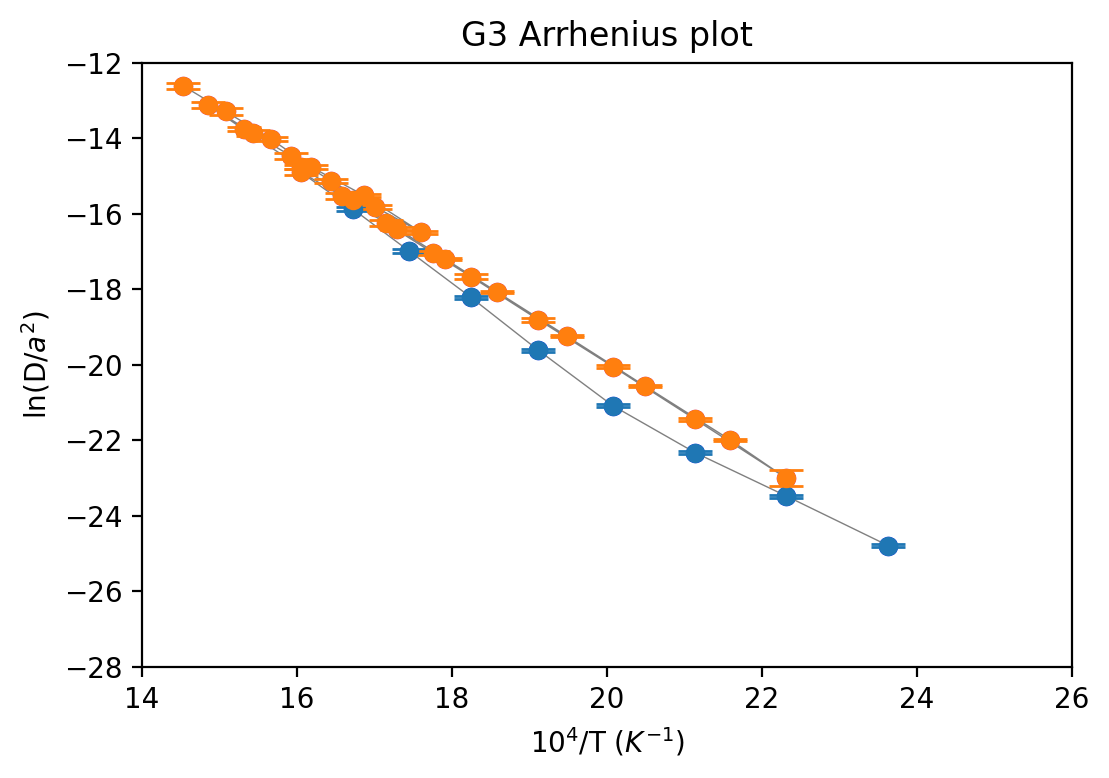

In [455]:
plt.figure(figsize = (6,4), dpi=200)
plt.xlabel(r'$10^{4}$/T ($K^{-1}$)')
plt.ylabel(r'ln(D/$a^{2}$)')
plt.xlim(14,26)
plt.ylim(-28,-12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.title('G3 Arrhenius plot')

# FIRST OF ALL input the index for the FIRST Arrhenius datapoint that will be used for regression

arr_1 = 8

# now we will make the Arrhenius plot. NOTE last step (index 20) is not included

x_axis1 = 1e4 / (He_data.temp_degC.iloc[:arr_1] + 273.15)
x_axis2 = 1e4 / (He_data.temp_degC.iloc[arr_1:] + 273.15)
x_axis_btwn = 1e4 / (He_data.temp_degC.iloc[arr_1-1:arr_1+1] + 273.15)

plt.plot(x_axis1, He_data.ln_D_a2.iloc[:arr_1], color = 'gray', linewidth=0.5)
plt.plot(x_axis2, He_data.ln_D_a2.iloc[arr_1:], color = 'gray', linewidth=0.5)
plt.plot(x_axis_btwn, He_data.ln_D_a2.iloc[arr_1-1:arr_1+1], color = 'gray', linewidth=0.5)
plt.scatter(x_axis1, He_data.ln_D_a2.iloc[:arr_1], color = 'b')
plt.scatter(x_axis2, He_data.ln_D_a2.iloc[arr_1:], color = 'm')

plt.errorbar(x_axis1, He_data.ln_D_a2.iloc[:arr_1], yerr=He_data.ln_D_a2_sig.iloc[:arr_1], fmt='o', capsize=6)
plt.errorbar(x_axis2, He_data.ln_D_a2.iloc[arr_1:], yerr=He_data.ln_D_a2_sig.iloc[arr_1:], fmt='o', capsize=6)

#plt.savefig('.pdf') 
plt.show()

### 4. Doing weighted and unweighted regression for Arrhennius plot
First we'll set up the linear regression equations

DON'T FORGET TO CHANGE THE n-value to the number of datapoints to regress!!!

In [456]:
#THIS IS FOR UNWEIGHTED LINEAR REGRESSION
#insert n-value here. will be used for the rest of the calc
n = 29

def ord_lin_regress(X_vals, Y_vals):
    
    #hint: it helps to create arrays for XY values and X^2 (use x**2 to raise something to a power) from your input
    #first create some empty arrays
    
    XY_vals = []
    X2_vals = []
    
    #then try this for loop (remember that Python uses zero indexing):
    
    for i in range(len(X_vals)):
        XY = X_vals[i] * Y_vals[i]
        X2 = X_vals[i]**2
        
        XY_vals.append(XY)
        X2_vals.append(X2)
        
    #now calculate slope and intercept below using the sum function, I'll let you try the math here
    
    slope = (sum(XY_vals) - (sum(X_vals)*sum(Y_vals)/n)) / (sum(X2_vals) - ((sum(X_vals)**2)/n))
    intercept = (sum(X_vals) * sum(XY_vals) - sum(Y_vals) * sum(X2_vals)) / ((sum(X_vals)**2) - n*sum(X2_vals))
    
    return slope, intercept

Now we'll calculate the slope and intercept for the Arrhenius trend. To make things easier we'll make a new dataframe only with the data we want to calculate the linear regression with.

In [457]:
#THIS IS FOR UNWEIGHTED LINEAR REGRESSION

#making new lists. don't forget to change the range of datapoints
#first define the first index after the last data for regression, or basically the last index of data for regression plus 1
arr_limit = 50

x_axis2 = 1e4 / (He_data.temp_degC.iloc[arr_1:arr_limit] + 273.15)
ln_D_a2_arr = He_data.ln_D_a2.iloc[arr_1:arr_limit]
ln_D_a2_sig_arr = He_data.ln_D_a2_sig.iloc[arr_1:arr_limit]

arrhenius_data = {'temp': x_axis2, 'ln_D_a2_arr':ln_D_a2_arr, 'ln_D_a2_sig_arr':ln_D_a2_sig_arr}
#making new dataframe and resetting index
arr_data = pd.DataFrame(arrhenius_data)
arr_data.reset_index(inplace=True)

#now we'll do the calculation
arrhenius = ord_lin_regress(arr_data.temp, arr_data.ln_D_a2_arr)

slope_un = arrhenius[0]
intercept_un = arrhenius[1]

print('The unweighted slope is ', arrhenius[0])
print('The unweighted intercept is ', arrhenius[1])

The unweighted slope is  -1.3306436124762995
The unweighted intercept is  6.677344380577409


#### 4.5 Weighted linear regression with errors in y (`D_a2`)
Alternatively, we can calculate the slope and intercept using weighted linear regression, taking into account the errors in `ln_D_a2`.

In [458]:
#first calculate the weighing factor, w that will be used for 
w_i = []

for i in range(len(arr_data)):
    w = (n * arr_data.ln_D_a2_sig_arr[i]**(-2)) / np.sum(arr_data.ln_D_a2_sig_arr**(-2))
    w_i.append(w)

arr_data['w_i'] = w_i

w_sum = np.sum(arr_data.w_i)
print(w_sum)  # check that this is equal to the number of datapoints to regress, n
arr_data

28.999999999999996


,index,temp,ln_D_a2_arr,ln_D_a2_sig_arr,w_i
0,8,16.047501,-14.902253,0.080803,0.307695
1,9,16.579624,-15.530467,0.079998,0.313923
2,10,17.148247,-16.252721,0.078961,0.322218
3,11,17.757258,-17.049023,0.052271,0.735299
4,12,18.243182,-17.668669,0.056394,0.631694
5,13,19.114977,-18.813692,0.054008,0.688749
6,14,20.074275,-20.052356,0.028317,2.505463
7,15,21.134947,-21.447585,0.040049,1.252542
8,16,22.313957,-23.010472,0.218005,0.042272
9,17,21.591277,-21.997337,0.036912,1.474516


In [459]:
wy_i = []
wx_i = []
wxy_i = []
w_x2_i = []  # w * x^2
    
#then try this for loop (remember that Python uses zero indexing):
    
for i in range(len(arr_data)):
    wy = arr_data.w_i[i] * arr_data.ln_D_a2_arr[i]
    wx = arr_data.w_i[i] * arr_data.temp[i]
    wxy = arr_data.w_i[i] * arr_data.temp[i] * arr_data.ln_D_a2_arr[i]
    w_x2 = arr_data.w_i[i] * arr_data.temp[i]**2
        
    wy_i.append(wy)
    wx_i.append(wx)
    wxy_i.append(wxy)
    w_x2_i.append(w_x2)
        
#now calculate slope and intercept below using the sum function, I'll let you try the math here
    
slope_wght = (n * sum(wxy_i) - sum(wx_i) * sum(wy_i)) / (n * sum(w_x2_i) - sum(wx_i)**2)
intercept_wght = (sum(wy_i) - slope_wght * sum(wx_i)) / n

print('The weighted slope is ', slope_wght)
print('The weighted intercept is ', intercept_wght)

The weighted slope is  -1.332354223531688
The weighted intercept is  6.7190234567104765


### 5. Calculting std dev and 95% confidence interval in `slope` and `intercept` of linear regressions.
We will use the equation in "Chemometrics using R: Chapter 8.1".

#### Uncertainty for unweighted regression
First, we will calculate the standard deviation about the regression, `s_r`.

In [460]:
y_min_y_2 =[]

#calculating std dev about the regression, s_r. uncomment the eq you want to use
for i in range(len(arr_data)):
    #reg_eq = slope_un * arr_data.temp[i] + intercept_un  # unweighted linear eq
    reg_eq = slope_wght * arr_data.temp[i] + intercept_wght  # weighted linear eq
    yi_min_yp_2 = (arr_data.ln_D_a2_arr[i] - reg_eq) ** 2
    
    y_min_y_2.append(yi_min_yp_2)
    
s_r = np.sqrt(np.sum(y_min_y_2) / (n - 2))  # same n as in section 4
print('Standard deviation about the regression =', s_r)

Standard deviation about the regression = 0.10898676305799575


Now, we will calculate the standard deviations for the slope, `s_slope`, and y-intercept, `s_int`. IMPORTANT: Make sure to choose which equation to use for `reg_u` above!

In [461]:
#first to calculate the mean of x (temp)
mean_T = np.mean(arr_data.temp)

x2 = []
x_min_x2 = []

# now to calculate x_i - x_expected in a for loop
for i in range(len(arr_data)):
    
    x2_i = arr_data.temp[i] ** 2
    x_min_x2_i = (arr_data.temp[i] - mean_T) ** 2
    
    x2.append(x2_i)
    x_min_x2.append(x_min_x2_i)
    
#calculating std dev for slope and intercept
s_slope = np.sqrt((s_r ** 2) / np.sum(x_min_x2))
s_int = np.sqrt((s_r**2 * sum(x2)) / (n * sum(x_min_x2)))

print(s_slope, s_int)

0.009820744667432326 0.17302297167137398


To calculate the confidence interval, we need to select the t-test critical values `alpha_t` and degrees of freedom `df` (simply n-2). Make sure to use the two-tailed `alpha_t`. The t value can be found online (e.g., https://www.medcalc.org/manual/t-distribution-table.php)

In [462]:
# we want to calculate 95% confidence interval (alpha_T = 0.05)
t_test = 2.052  # for n =  (df = n - 2)

CI95_slope = s_slope * t_test
CI95_int = s_int * t_test

print(CI95_slope, CI95_int)

0.020152168057571133 0.3550431378696594


### 6. Calculate diffusion kinetic parameters  `E_a` and `D_0` with uncertainties.
Now we can calculate the diffusion kinetic parameters: activation energy `E_a` and frequency factor `D_0`.
#### NOTE: only either the weighted or unweighted uncertainties can be reported at a time due to the way the code is set up in part 5.

In [463]:
#calculating activation energy and frequency factor with UNWEIGHTED lin reg

E_a = - gas_constant * slope_un * 10  # in kJ/mol
D_0 = np.exp(intercept_un) * half_width**2

#uncertainty calculation.

E_a_stdv = E_a - (- gas_constant * (slope_un+s_slope) * 10)
E_a_CI95 = E_a - (- gas_constant * (slope_un+CI95_slope) * 10)
D_0_stdev = np.exp(intercept_un+s_int) * half_width**2 - D_0
D_0_CI95 = np.exp(intercept_un+CI95_int) * half_width**2 - D_0

print(u'Unweighted E_a =', E_a, '\u00B1', E_a_stdv, 'kJ/mol (1\u03C3).')
print(u'Unweighted E_a =', E_a, '\u00B1', E_a_CI95, 'kJ/mol (95% CI).')
print(u'Unweighted D_0 =', D_0, '\u00B1', D_0_stdev, 'cm^2/s (1\u03C3).')
print(u'Unweighted D_0 =', D_0, '\u00B1', D_0_CI95, 'cm^2/s (95% CI).')
print('These are not the actual errors. Please see note for part 5 above.') #uncomment if necessary

Unweighted E_a = 110.63599057913044 ± 0.8165430655651562 kJ/mol (1σ).
Unweighted E_a = 110.63599057913044 ± 1.6755463705397062 kJ/mol (95% CI).
Unweighted D_0 = 0.014203951756126812 ± 0.0026830329627890535 cm^2/s (1σ).
Unweighted D_0 = 0.014203951756126812 ± 0.006054323332790211 cm^2/s (95% CI).
These are not the actual errors. Please see note for part 5 above.


In [464]:
#calculating activation energy and frequency factor with WEIGHTED lin reg

Ea_w = - gas_constant * slope_wght * 10  # in kJ/mol
D0_w = np.exp(intercept_wght) * half_width**2

#uncertainty calculation.

Ea_w_stdv = Ea_w - (- gas_constant * (slope_wght+s_slope) * 10)
Ea_w_CI95 = Ea_w - (- gas_constant * (slope_wght+CI95_slope) * 10)
D0_w_stdev = np.exp(intercept_wght+s_int) * half_width**2 - D0_w
D0_w_CI95 = np.exp(intercept_wght+CI95_int) * half_width**2 - D0_w

print(u'Weighted E_a =', Ea_w, '\u00B1', Ea_w_stdv, 'kJ/mol (1\u03C3).')
print(u'Weighted E_a =', Ea_w, '\u00B1', Ea_w_CI95, 'kJ/mol (95% CI).')
print(u'Weighted D_0 =', D0_w, '\u00B1', D0_w_stdev, 'cm^2/s (1\u03C3).')
print(u'Weighted D_0 =', D0_w, '\u00B1', D0_w_CI95, 'cm^2/s (95% CI).')
#print('These are not the actual errors. Please see note for part 5 above.') #uncomment if necessary

Weighted E_a = 110.77821885635963 ± 0.8165430655651562 kJ/mol (1σ).
Weighted E_a = 110.77821885635963 ± 1.6755463705397204 kJ/mol (95% CI).
Weighted D_0 = 0.014808469708885037 ± 0.0027972224237007657 cm^2/s (1σ).
Weighted D_0 = 0.014808469708885037 ± 0.006311994381616183 cm^2/s (95% CI).


### 7. Recalculating diffusion kinetic parameters `E_a` and `D_0` and their errors.
This time we'll use the compact equations 13(a-b) in York et al. (2004) to calculate the erros in the slope and intercept (and thus `E_a` and `D_0`. This is a little more elaborate than the method in section 5. We'll also take into account the errors in the x-axis `1e4/T`. We'll use the unweighted slope as the initial value of b.

In [465]:
# making a new dataframe for this calculation
aliquot_ID = He_data.sample_ID.iloc[arr_1:arr_limit]

York_arr = pd.DataFrame()
York_arr['aliquot_ID'] = aliquot_ID
York_arr['temp'] = arr_data['temp'].values
York_arr['ln_D_a2_arr'] = arr_data['ln_D_a2_arr'].values
York_arr['ln_D_a2_sig_arr'] = arr_data['ln_D_a2_sig_arr'].values

# restarting index at 0 and deleting extra "Index" column
York_arr.reset_index(inplace=True)
York_arr = York_arr.drop(labels="index", axis=1)

# adding column for error in T from excel sheet (see spreadsheet for details)
temp_sig = pd.read_excel('G3_temp_err.xlsx')
York_arr.insert(loc = 3, column = 'temp_err', value = temp_sig.T_err)
#York_arr['temp_err'] = temp_sig['T_err'].values

In this next cell we'll calculate the weights for the X and Y vals (step 2), then do an iterative calculation for steps 3 - 5. This is done in a while loop (gay gods please help me).

In [466]:
# first we'll define the slope, b and correlation `r_i`
slope_york = slope_un
r_i = 0  # no correlation between errors in x and y
    
# determining weights `w_x` and `w_y` and adding it to the dataframe

w_X = []
w_Y = []

for i in range(len(York_arr)):
    
    weight_X = 1 / (York_arr.temp_err[i])**2
    weight_Y = 1 / (York_arr.ln_D_a2_sig_arr[i])**2
    
    w_X.append(weight_X)
    w_Y.append(weight_Y)
    
York_arr['w_X'] = w_X
York_arr['w_Y'] = w_Y

# let's see if this works

tolerance = 1e-15  # input any number bigger than or equal to the desired tolerance
    
while tolerance >= 1e-15:
    
    W_i =[]
    U_i = []
    V_i = []
    beta_i = []    
    slope_guess = slope_york

    for i in range(len(York_arr)):
        alpha_i = np.sqrt(York_arr.w_X[i] * York_arr.w_Y[i])
        weight_W = (York_arr.w_X[i] * York_arr.w_Y[i]) / (York_arr.w_X[i] + (slope_guess**2) 
                                        * York_arr.w_Y[i] - (2 * slope_guess * r_i * alpha_i))
        W_i.append(weight_W)
        
    York_arr['W_i'] = W_i
        
    for i in range(len(York_arr)):
        
        X_mean = np.sum(York_arr.W_i * York_arr.temp) / np.sum(York_arr.W_i)
        Y_mean = np.sum(York_arr.W_i * York_arr.ln_D_a2_arr) / np.sum(York_arr.W_i)
    
        U_vals = York_arr.temp[i] - X_mean
        V_vals = York_arr.ln_D_a2_arr[i] - Y_mean
        
        beta_vals = York_arr.W_i[i] * (U_vals/York_arr.w_Y[i] + (slope_guess * V_vals)/York_arr.w_X[i] 
                            - (slope_guess*U_vals + V_vals) * (r_i / alpha_i))
        
        U_i.append(U_vals)
        V_i.append(V_vals)
        beta_i.append(beta_vals)
     
    York_arr['U_i'] = U_i
    York_arr['V_i'] = V_i
    York_arr['beta_i'] = beta_i
    
    slope_york = np.sum(York_arr.W_i * York_arr.beta_i * York_arr.V_i) / np.sum(York_arr.W_i * York_arr.beta_i * York_arr.U_i)
    tolerance = abs(slope_york - slope_guess)


#York_arr['W_i'] = W_i   
#York_arr['U_i'] = U_i
#York_arr['V_i'] = V_i
#York_arr['beta_i'] = beta_i

print('Slope = ', slope_york)
print('Tolerance = ', tolerance)

print('The weighted mean of X is', X_mean)
print('The weighted mean of Y is', Y_mean)
York_arr

Slope =  -1.3373622103261489
Tolerance =  2.220446049250313e-16
The weighted mean of X is 16.753840424916543
The weighted mean of Y is -15.607302841084497


,aliquot_ID,temp,ln_D_a2_arr,temp_err,ln_D_a2_sig_arr,w_X,w_Y,W_i,U_i,V_i,beta_i
0,RS23_G3_350_1,16.047501,-14.902253,0.084842,0.080803,138.925275,153.158781,51.537704,-0.706340,0.705050,-0.587477
1,RS23_G3_330_2,16.579624,-15.530467,0.078916,0.079998,160.571066,156.258713,57.018237,-0.174217,0.076835,-0.100060
2,RS23_G3_310_2,17.148247,-16.252721,0.100814,0.078961,98.391842,160.387679,40.962461,0.394406,-0.645418,0.460080
3,RS23_G3_290_2,17.757258,-17.049023,0.108577,0.052271,84.825865,366.002994,41.986757,1.003418,-1.441720,1.069473
4,RS23_G3_275_2,18.243182,-17.668669,0.121143,0.056394,68.140001,314.432335,33.980874,1.489341,-2.061366,1.535744
5,RS23_G3_250_2,19.114977,-18.813692,0.142514,0.054008,49.236286,342.832174,25.482589,2.361136,-3.206389,2.394841
6,RS23_G3_225_2,20.074275,-20.052356,0.155904,0.028317,41.142031,1247.121726,22.586558,3.320434,-4.445053,3.323686
7,RS23_G3_200_2,21.134947,-21.447585,0.170434,0.040049,34.425888,623.466571,18.671622,4.381106,-5.840282,4.367438
8,RS23_G3_175_2,22.313957,-23.010472,0.175429,0.218005,32.493449,21.041104,9.749530,5.560117,-7.403169,5.546987
9,RS23_G3_190_3,21.591277,-21.997337,0.181714,0.036912,30.284542,733.956497,16.550741,4.837437,-6.390034,4.779426


In [467]:
# now calculating the y-intercept `int_york`
intercept_york = Y_mean - slope_york * X_mean

# now calculating new E_a and D_0
Ea_york = - gas_constant * slope_york * 10  # in kJ/mol
D0_york = np.exp(intercept_york) * half_width**2

print('E_a = ', Ea_york, 'kJ/mol')
print('D_0 = ', D0_york, 'cm^2/s')

E_a =  111.19460651614875 kJ/mol
D_0 =  0.016035837463965287 cm^2/s


In [468]:
# calculatiing adjusted values `adj_x_i`
x_adj = []

for i in range(len(York_arr)):
    adj_x_i = X_mean + York_arr.beta_i[i]
    
    x_adj.append(adj_x_i)

York_arr['x_adj'] = x_adj

# calculating adjusted mean of x `mean_x_adj`
mean_x_adj = np.sum(York_arr.W_i * York_arr.x_adj) / np.sum(York_arr.W_i)

# calculating adjusted u `u_adj`
u_adj = []

for i in range(len(York_arr)):
    adj_u_i = York_arr.x_adj[i] - mean_x_adj
    
    u_adj.append(adj_u_i)
    
York_arr['u_adj'] = u_adj

# calculating error in slope `sig_slope_york` and intercept `sig_int_york`
sig_slope_york = np.sqrt(1 / np.sum(York_arr.W_i * (York_arr.u_adj**2)))
sig_int_york = np.sqrt((1 / np.sum(York_arr.W_i)) + (mean_x_adj**2) * (sig_slope_york**2))

# finally calculating error in `Ea_york` and `D0_york`
Ea_york_sig = Ea_york - (- gas_constant * (slope_york+sig_slope_york) * 10)
D0_york_sig_max = (np.exp(intercept_york+sig_int_york) * half_width**2) - D0_york
D0_york_sig_min = D0_york - (np.exp(intercept_york-sig_int_york) * half_width**2)

print(u'Weighted (with EVA) E_a =', Ea_york, '\u00B1', Ea_york_sig, 'kJ/mol (1\u03C3).')
print(u'Weighted (with EVA) D_0 =', D0_york, '\u00B1', '(', D0_york_sig_min, '-',  D0_york_sig_max, ') cm^2/s (1\u03C3).')

Weighted (with EVA) E_a = 111.19460651614875 ± 1.447661827229581 kJ/mol (1σ).
Weighted (with EVA) D_0 = 0.016035837463965287 ± ( 0.004070811836073815 - 0.005455807532705595 ) cm^2/s (1σ).


### 8. Arrhenius plot with trend
Here we will replot the Arrhenius plot with the unweighted/weighted linear reg trend.

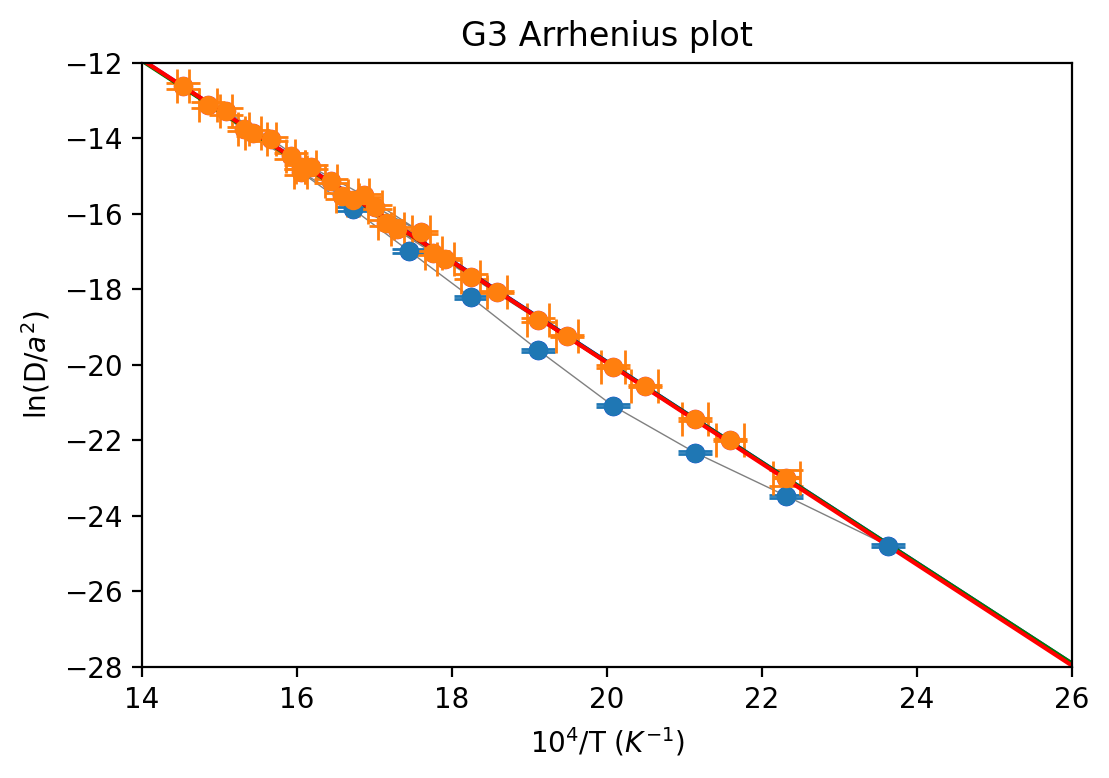

In [469]:
plt.figure(figsize = (6,4), dpi=200)
plt.xlabel(r'$10^{4}$/T ($K^{-1}$)')
plt.ylabel(r'ln(D/$a^{2})$')
plt.xlim(14,26)
plt.ylim(-28,-12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.title('G3 Arrhenius plot')

# now we will make the Arrhenius plot. NOTE last step (index 20) is not included

x_axis1 = 1e4 / (He_data.temp_degC.iloc[:arr_1] + 273.15)
x_axis2 = 1e4 / (He_data.temp_degC.iloc[arr_1:] + 273.15)
x_axis_btwn = 1e4 / (He_data.temp_degC.iloc[arr_1-1:arr_1+1] + 273.15)
x_regtrend = np.arange(12,28) # defining range of x for regression trend

plt.plot(x_axis1, He_data.ln_D_a2.iloc[:arr_1], color = 'gray', linewidth=0.5)
plt.plot(x_axis2, He_data.ln_D_a2.iloc[arr_1:], color = 'gray', linewidth=0.5)
plt.plot(x_axis_btwn, He_data.ln_D_a2.iloc[arr_1-1:arr_1+1], color = 'gray', linewidth=0.5)

# overlapping bigger datapoints
plt.scatter(x_axis1, He_data.ln_D_a2.iloc[:arr_1], color = 'b')
plt.scatter(x_axis2, He_data.ln_D_a2.iloc[arr_1:], color = 'm')

# plotting error bars with option to magnify errors by f_err degrees
f_err = 1

plt.errorbar(x_axis1, He_data.ln_D_a2.iloc[:arr_1], yerr=f_err*He_data.ln_D_a2_sig.iloc[:arr_1], fmt='o', capsize=6)
plt.errorbar(x_axis2, He_data.ln_D_a2.iloc[arr_1:arr_limit], yerr=f_err*He_data.ln_D_a2_sig.iloc[arr_1:arr_limit], xerr=York_arr.temp_err, fmt='o', capsize=6)

# finally plotting
reg_wght = slope_wght * x_regtrend + intercept_wght
reg_unwght = slope_un * x_regtrend + intercept_un
reg_york = slope_york * x_regtrend + intercept_york
plt.plot(x_regtrend, reg_wght, color = 'blue')
plt.plot(x_regtrend, reg_unwght, color = 'green')
plt.plot(x_regtrend, reg_york, color = 'red')

#plt.savefig('.pdf')
plt.show()

### 9. Calculating chi-squared and reduced chi-squared
This is a simple test to evaluate the goodness of fit of the regression. First, we'll calculate the `chi_sq` and then we'll calculate the `red_chisq`. This method takes into account each datapoint's error, and assumes that the errors are Gaussian. Basically we are maximizing the likelihood function.

To assess reduced chi-squared:
1. If `red_chisq` > 1, it is considered a "bad" fit
2. If `red_chisq` < 1, it is considered an overfit
3. The closer `red_chisq` is to 1, the better the fit

Additionally, we can also "improve" the reduced chi-squared (to 1) by calibrating the errors, but this is a problem for future me in part 9 of this very lengthy notebook.

In [470]:
chisq = [] # making a list of individual terms

# note that `reg_eq` is either the weighted/unweighted function. see part 5

for i in range(len(arr_data)):
    unwght_reg = slope_un * arr_data.temp[i] + intercept_un  # unweighted reg eq
    wght_reg = slope_wght * arr_data.temp[i] + intercept_wght  # weighter reg eq
    chi = ((arr_data.ln_D_a2_arr[i] - wght_reg)**2 / (f_err*arr_data.ln_D_a2_sig_arr[i])**2)
    
    chisq.append(chi)
    
# calculating chi-squared
chi_sq = np.sum(chisq)

# now calculating reduced chi-squared, red_chisq
red_chisq = chi_sq / (n - 2)

red_chisq

4.65642981756206

Calculating reduced chi squared for the weighted least square solution with EVA (ie, following York et al. (2004))

In [471]:
# revise this to account for error in x

chisq_york = [] # making a list of individual terms

for i in range(len(York_arr)):
    york_reg = slope_york * York_arr.temp[i] + intercept_york  # weighted reg eq
    chi_york = ((York_arr.ln_D_a2_arr[i] - york_reg)**2 / (f_err*York_arr.ln_D_a2_sig_arr[i])**2)
    
    chisq_york.append(chi_york)
    
# calculating chi-squared
chi_sq_york = np.sum(chisq_york)

# now calculating reduced chi-squared, red_chisq
red_chisq_york = chi_sq_york / (n - 2)

red_chisq_york

4.791378347396362

### END (FOR NOW)
misc stuff below

Some random but useful lines of code:

In [472]:
#adding new empty columns
#He_data.insert(loc=4, column='temp_degC', value='')

#appending new values one by one OR to replace an existing one
#He_data.at['RS23_G168_200_1', 'temp_degC'] = 200
#He_data.at['RS23_G168_200_1', 'time_s'] = 3600

#if you need to delete a row/column for some reason
#He_data = He_data.drop(labels="time_s", axis=1)

Calculating fraction and ln(D/${a^2}$) for the first heating step (not needed anymore but just keeping it here)

In [473]:
#calculating first fraction, f_first and ln(D/a^2)

#f_first = He_data.mol_He[0] / He_mol_total
#ln_D_a2 = np.log((f_first**2) * (np.pi / (4 * He_data.time_s[0])))

#print(f_first, ln_D_a2)

#adding columns for frac, f_cum, and ln_D_a2
#He_data['frac'] = ''
#He_data['f_cum'] = ''
#He_data['ln_D_a2'] = ''

#appending to first row of dataframe

#He_data.at['RS23_G168_150_1', 'frac'] = f_first
#He_data.at['RS23_G168_150_1', 'ln_D_a2'] = ln_D_a2

#He_data